In [40]:
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.io as scio
from scipy import stats
import numpy as np
import os 
import mne
import warnings
warnings.filterwarnings("ignore")

#### Apply a path setting  

In [3]:
list_tasks_info = pd.read_csv('../task_track_files/task_track_file_matlab_linux_double_calculation.csv', usecols=[
                              'local_file_path', 'raw_data_file_name', 'Group_file_type', 'preprocessed_two', 'ERP_npy_file_with_normalization_and_baseline_correction', 'ERP_nobaseline_npy_file'])
num_task_file = list_tasks_info.shape[0]
list_tasks_info
Path = '/mnt/D/Mastersharif/MasterProject/data/parkinsons-oddball'

#### Load each subject

In [4]:
i = 0
Path_to_load_file = os.path.join(Path,list_tasks_info['local_file_path'][i],list_tasks_info['preprocessed_two'][i])
EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)
events, event_dict = mne.events_from_annotations(EEG, verbose=0)

/tmp/ipykernel_725487/2707085406.py:3: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)


In [10]:
event_dict['S200']
event_dict['S200']


{'S  1': 1,
 'S  2': 2,
 'S  3': 3,
 'S  4': 4,
 'S200': 5,
 'S201': 6,
 'S202': 7,
 'boundary': 8}

###  Plot of Latency delay between two stimulus

In [24]:
I200 = np.where(events[:,2] == event_dict['S200'])
I201 = np.where(events[:,2] == event_dict['S201'])
I202 = np.where(events[:,2] == event_dict['S202'])

start_index = np.min([I200[0][0],I201[0][0],I202[0][0]])


Text(0.5, 1.0, '5')

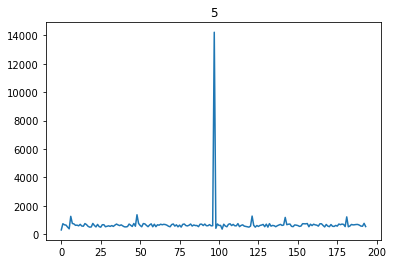

In [29]:
delay_latency = events[start_index+1:,0]-events[start_index:-1,0]
plt.plot(delay_latency)
plt.title(f'{200-(events.shape[0]-start_index)}')

#### Plot all over the subjects

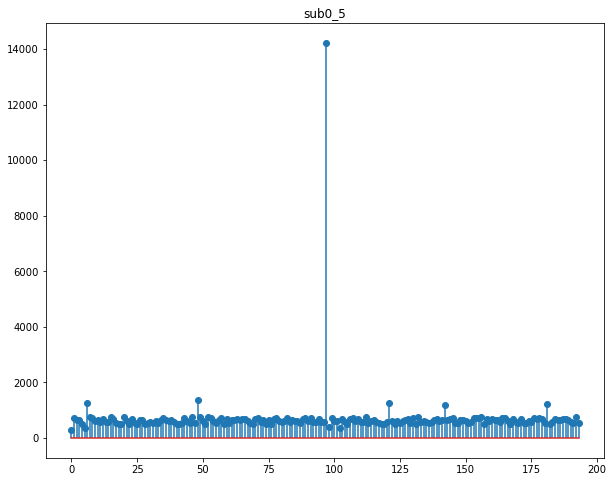

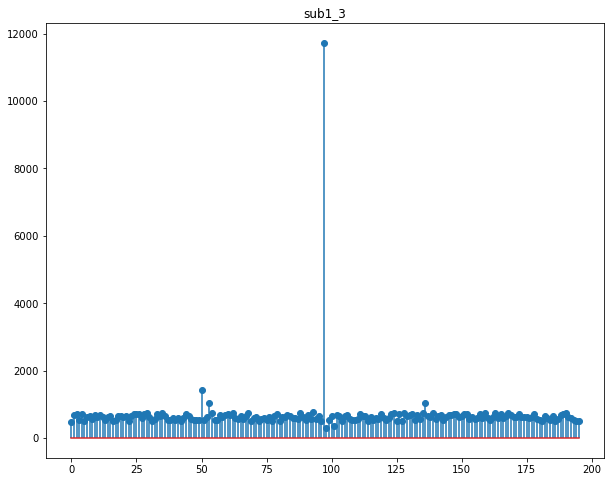

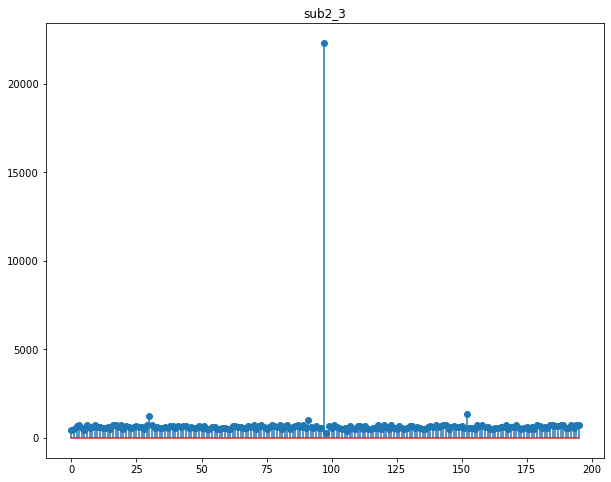

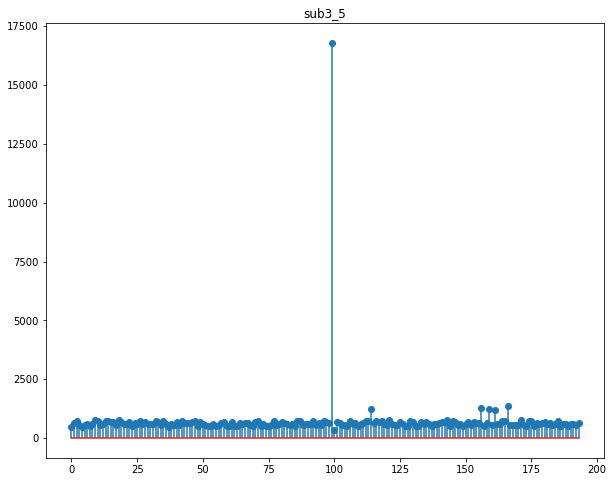

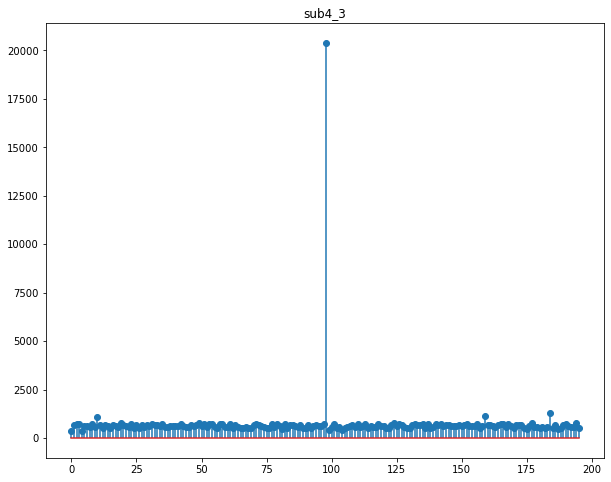

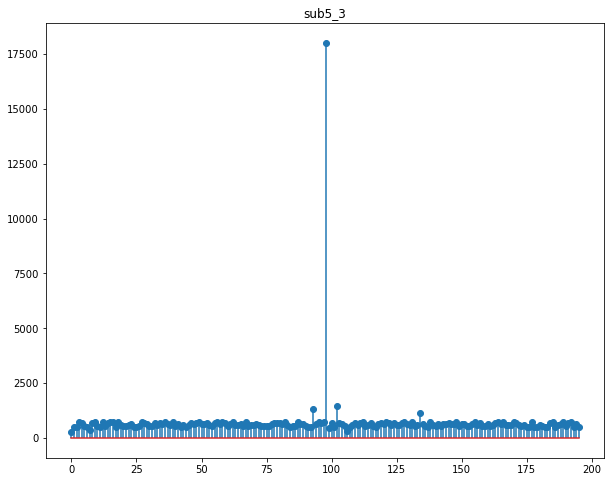

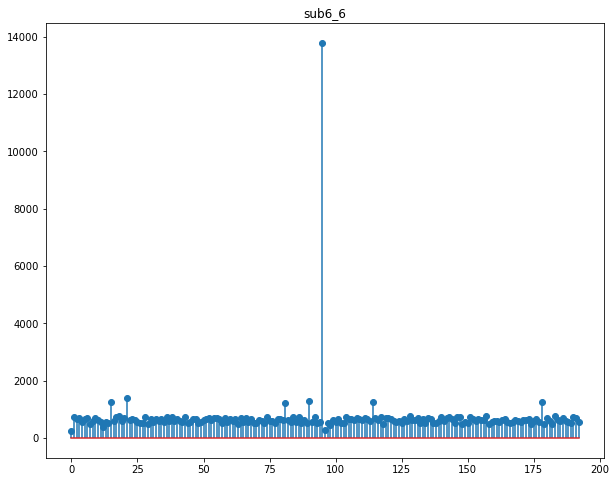

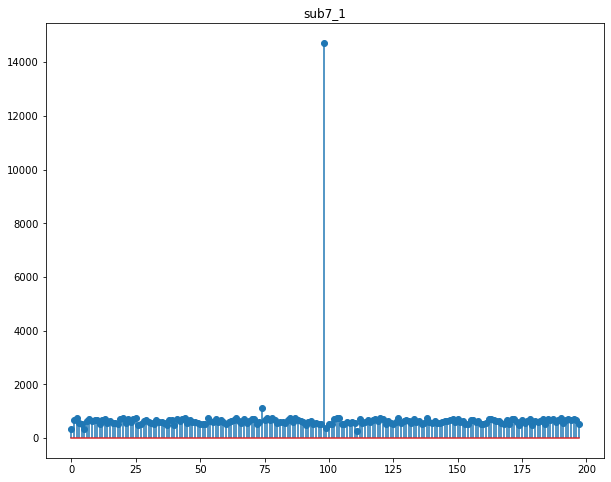

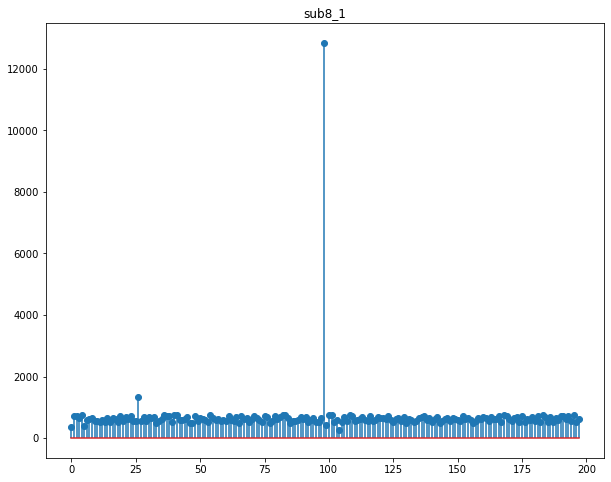

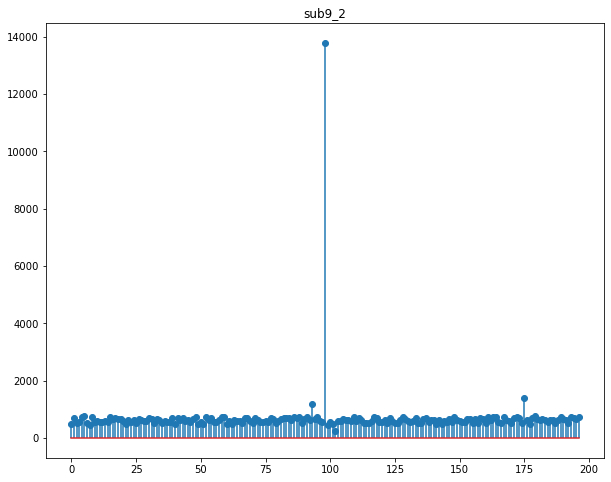

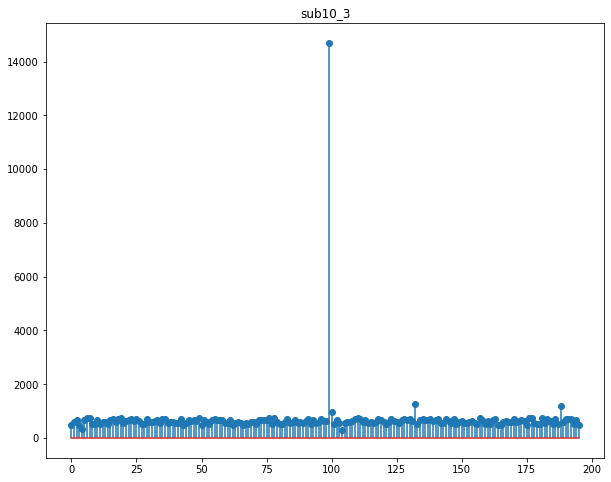

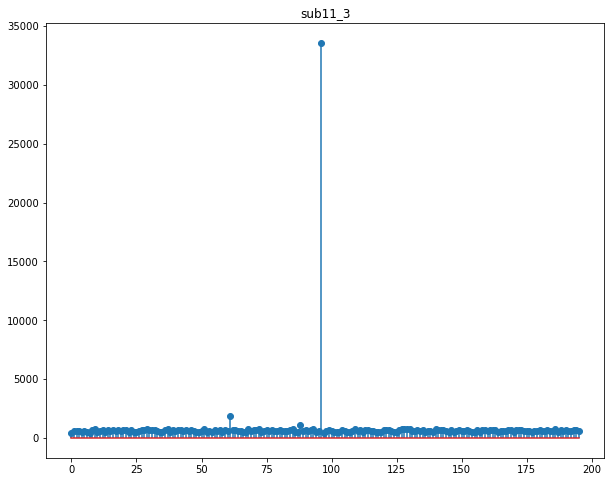

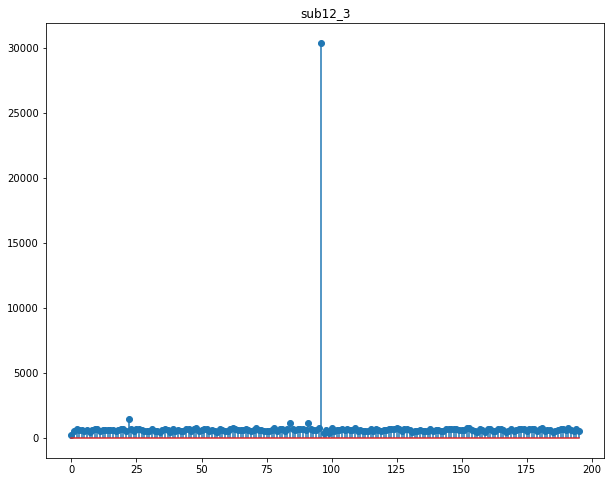

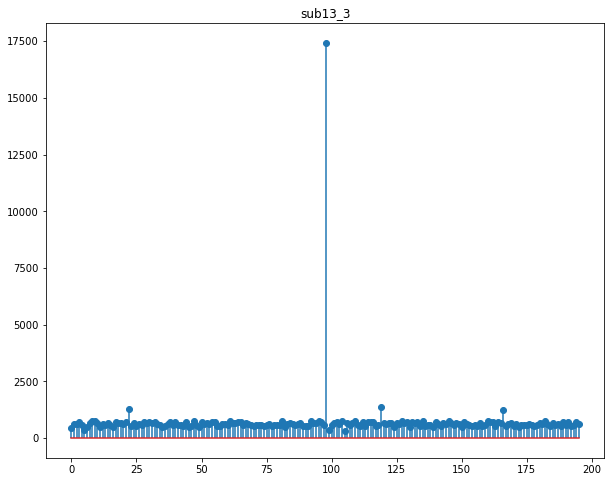

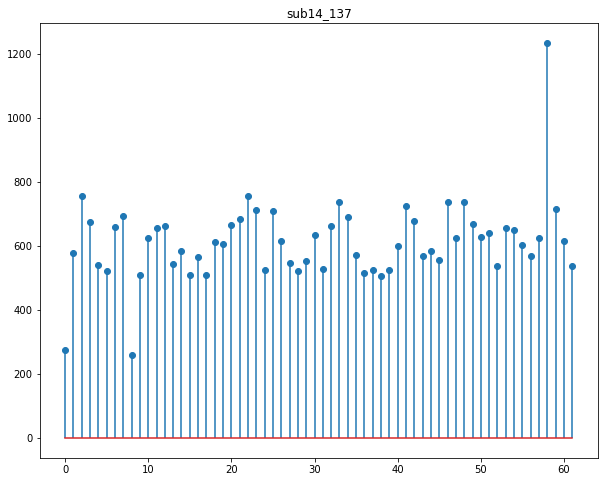

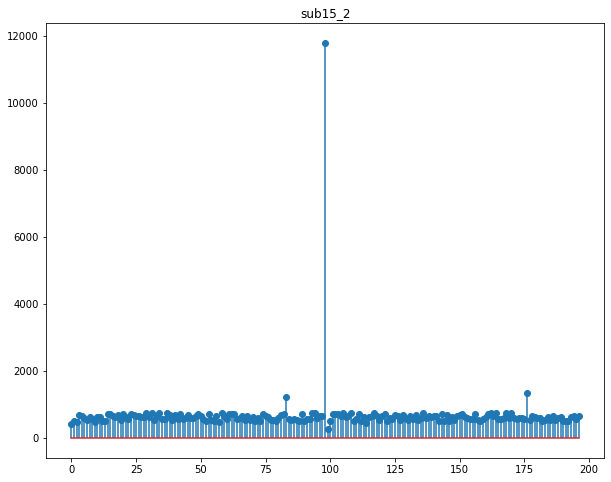

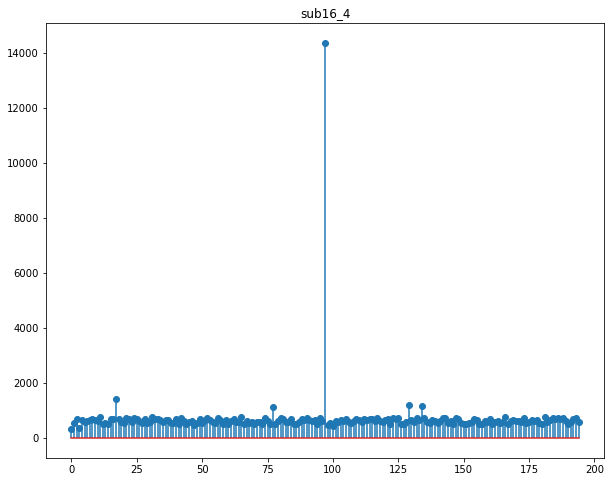

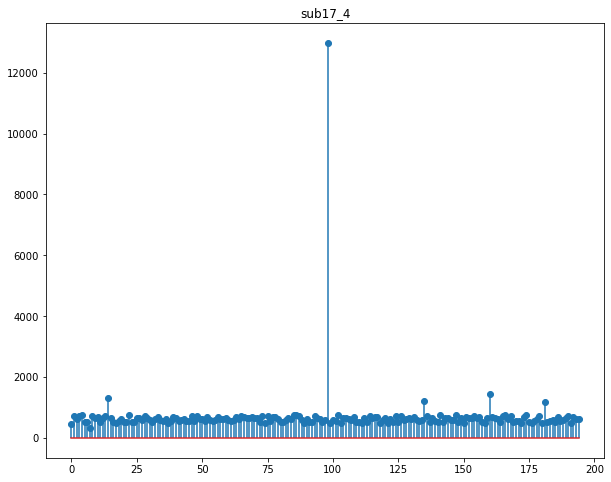

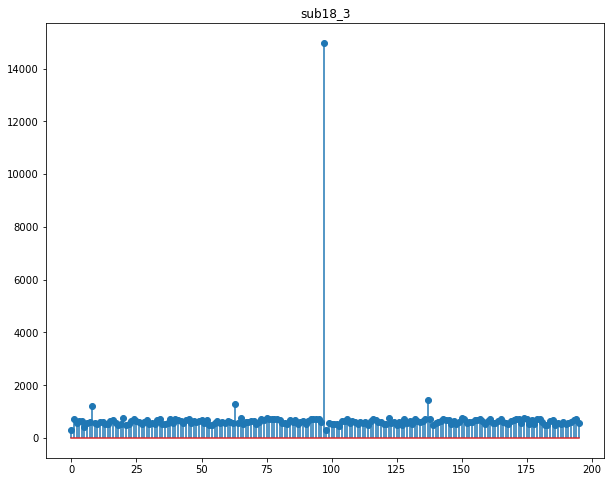

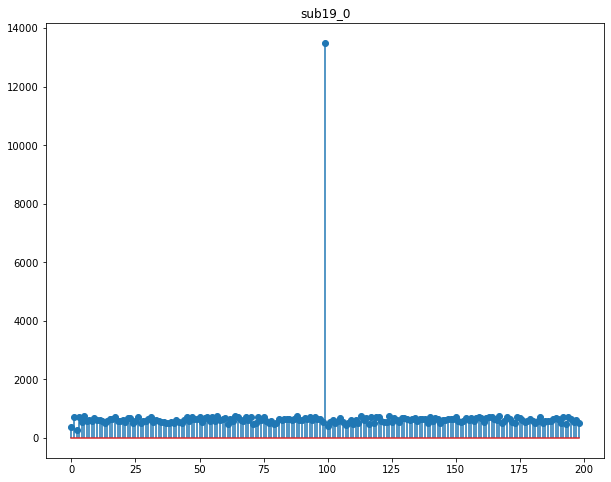

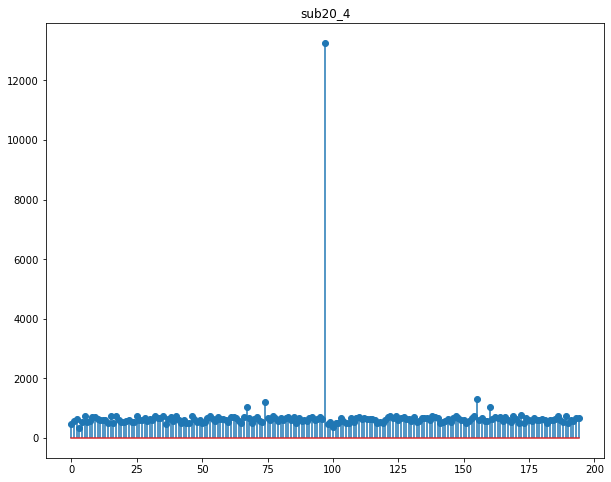

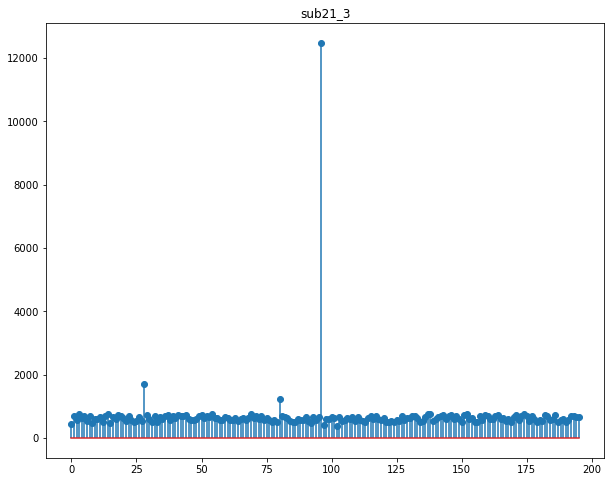

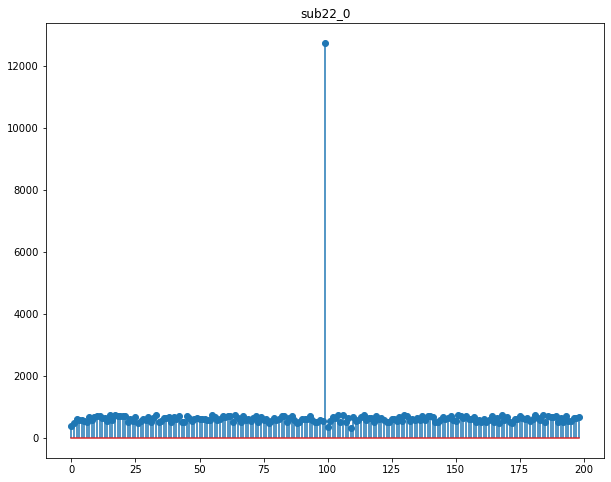

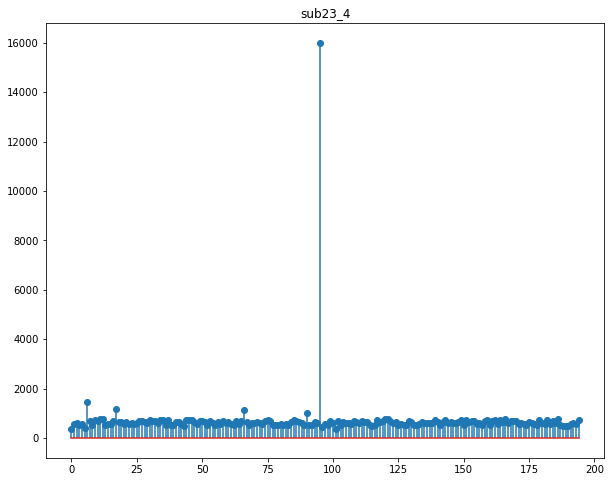

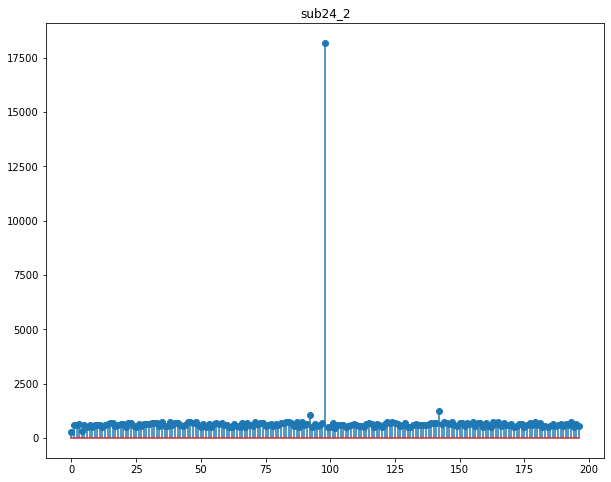

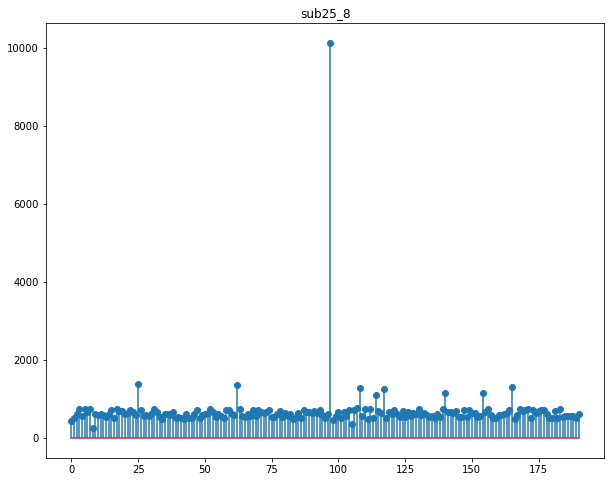

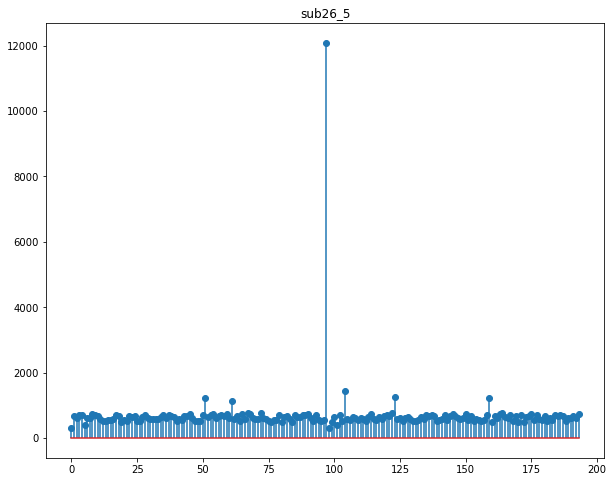

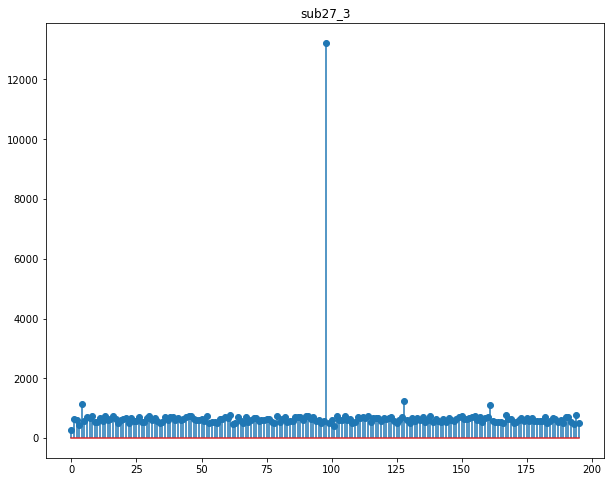

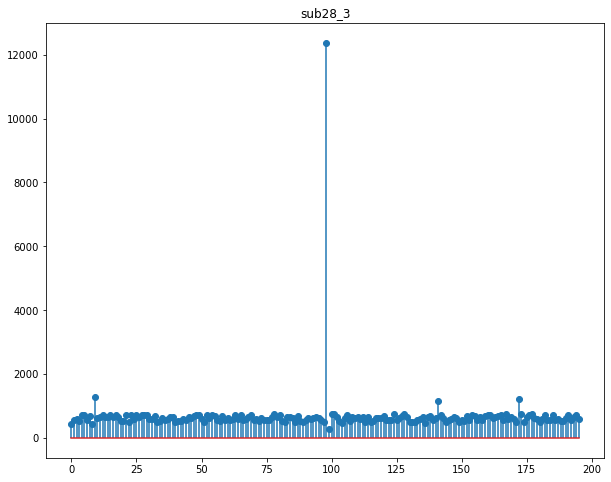

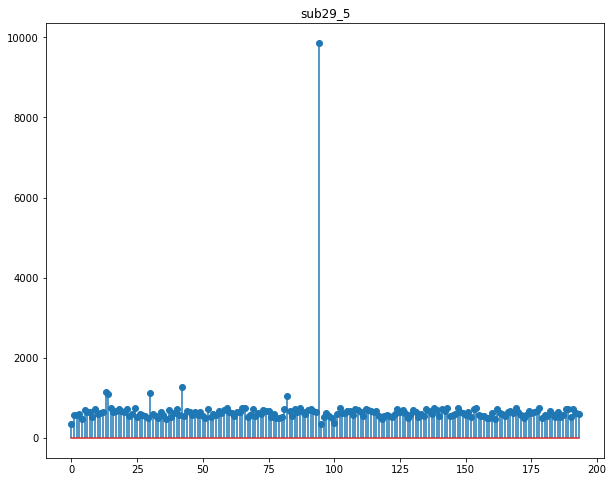

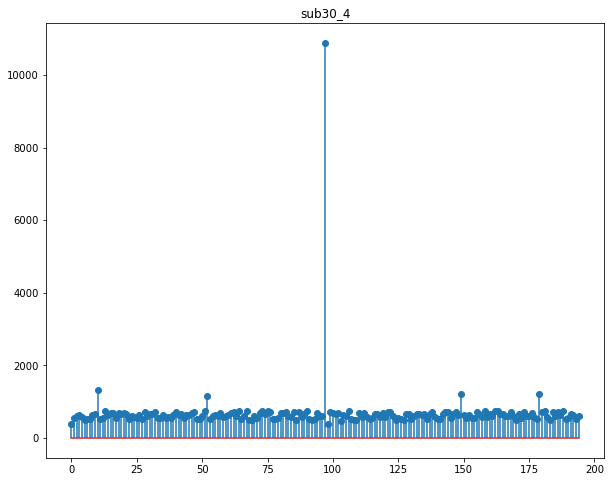

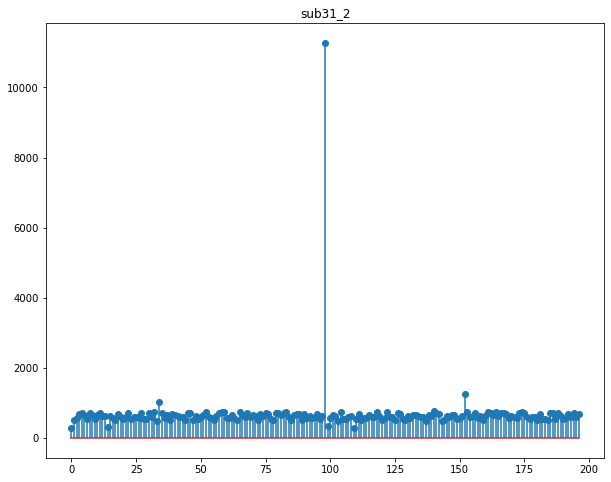

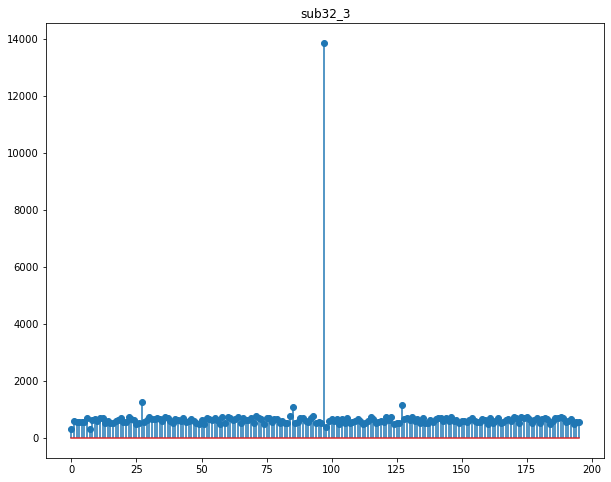

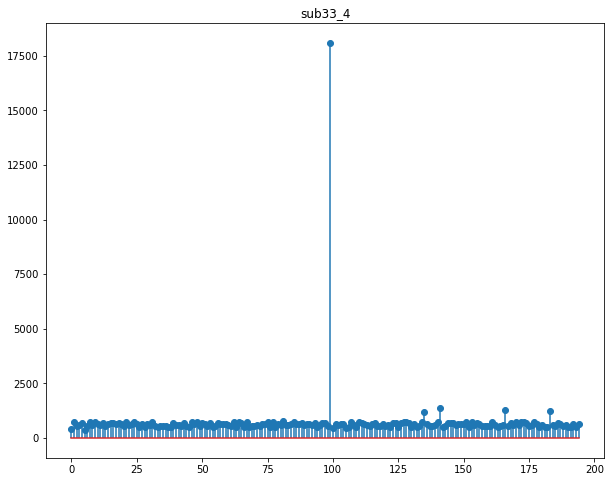

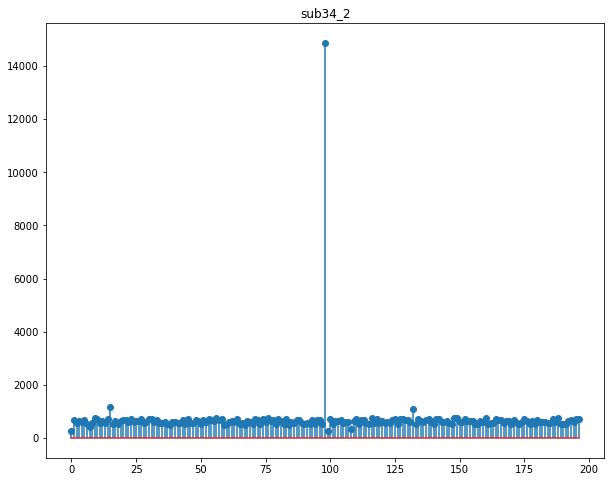

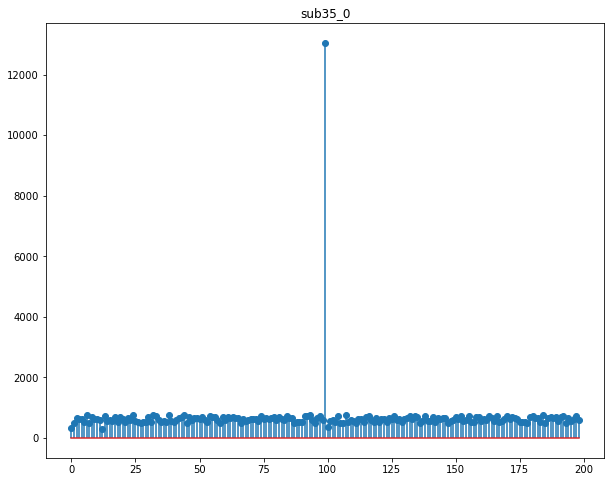

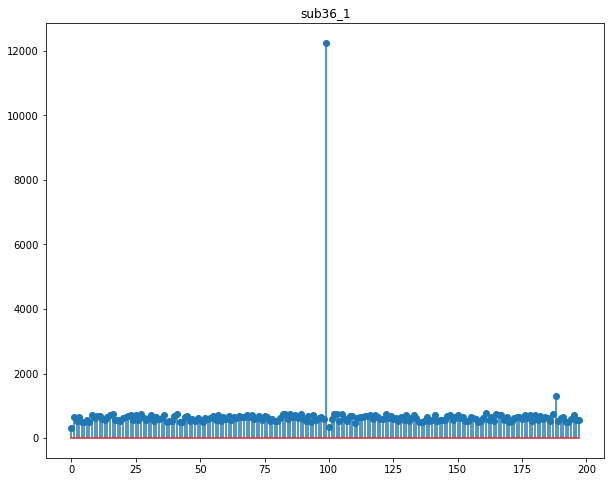

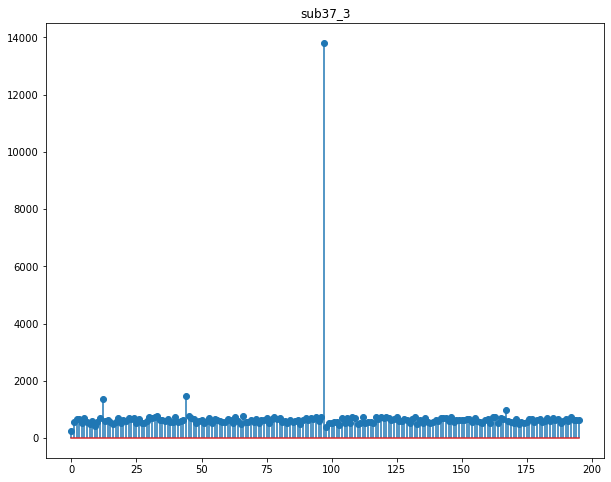

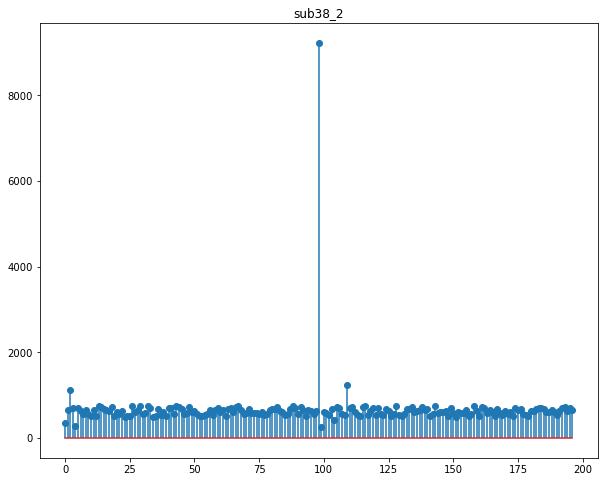

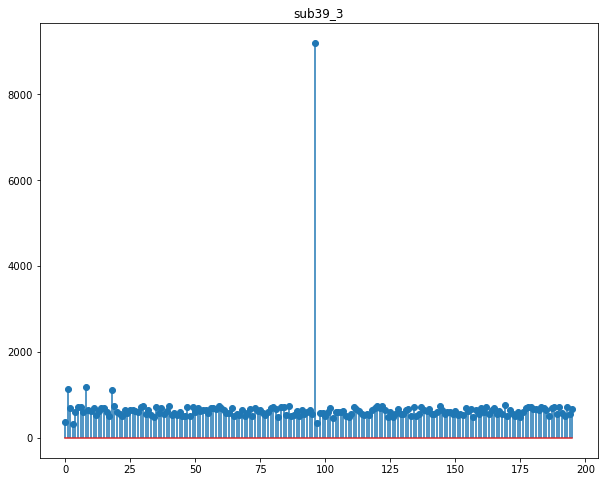

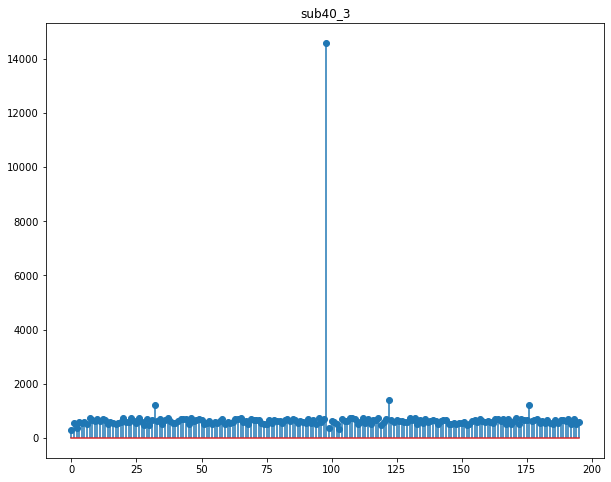

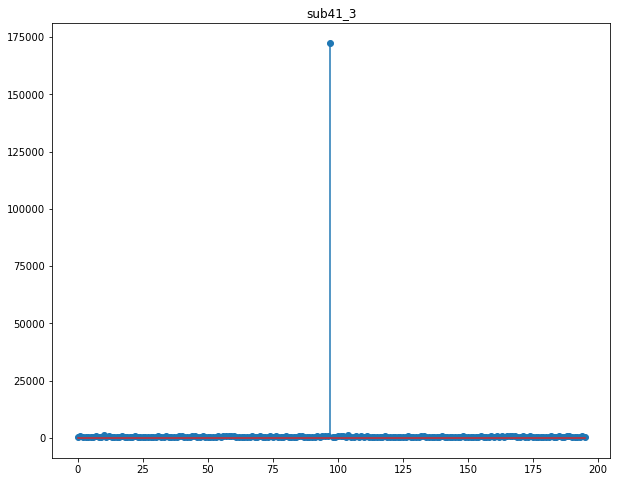

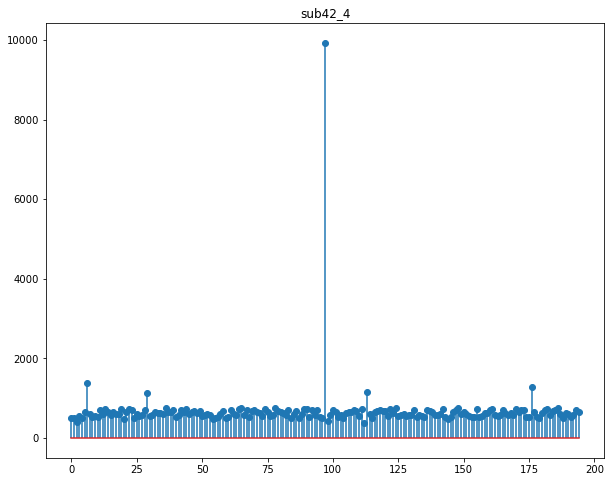

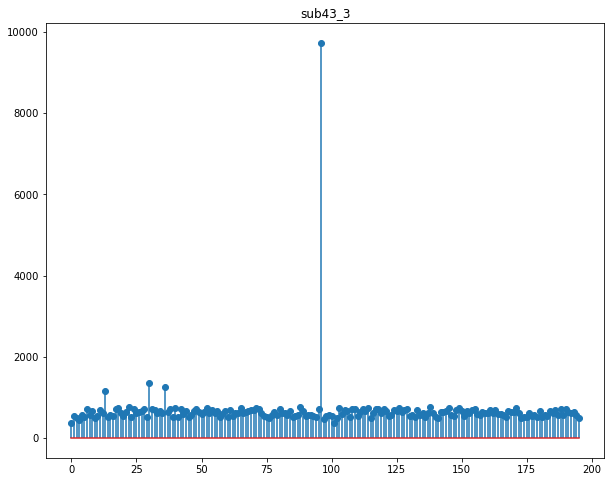

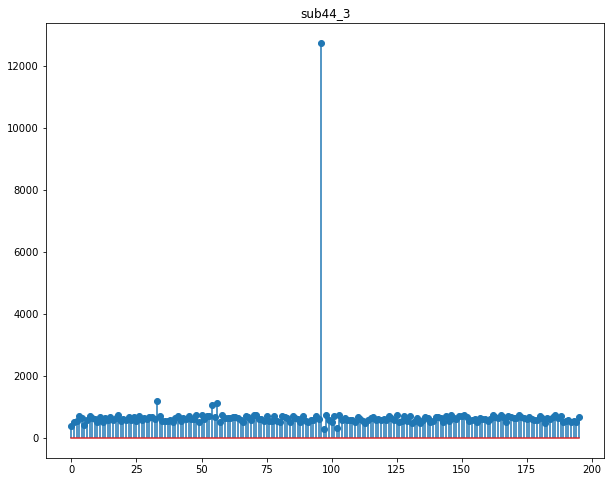

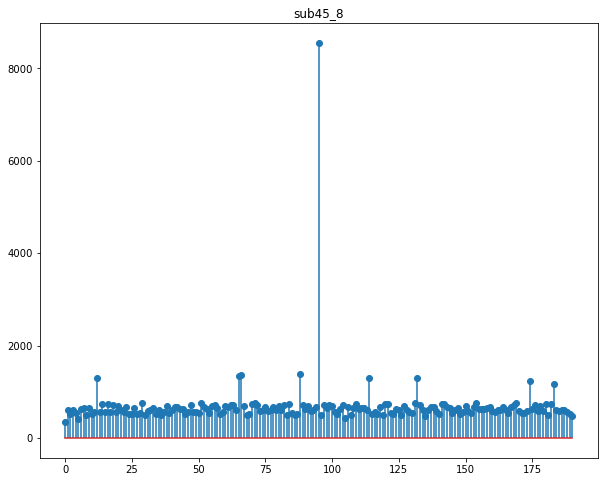

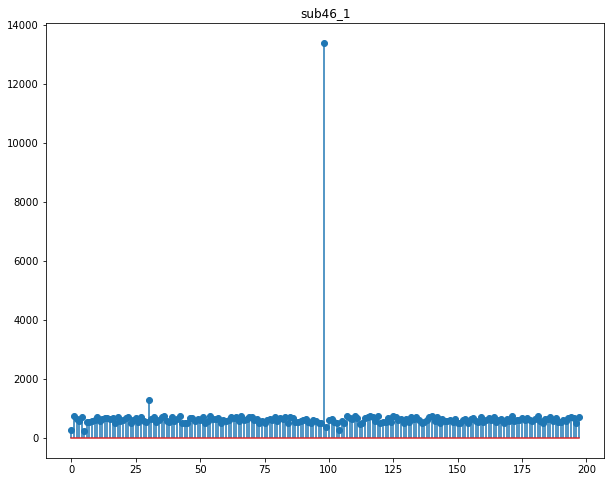

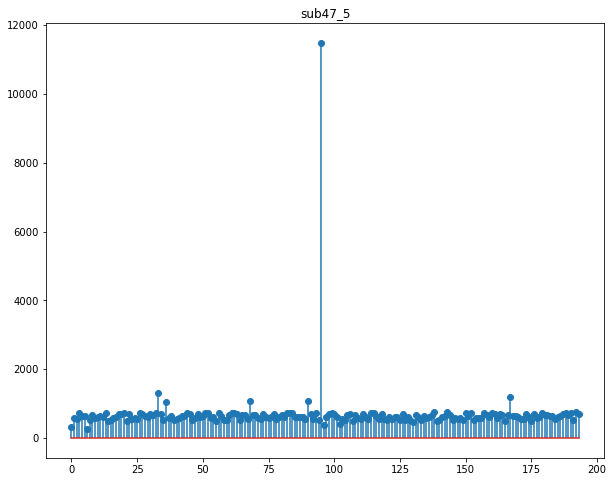

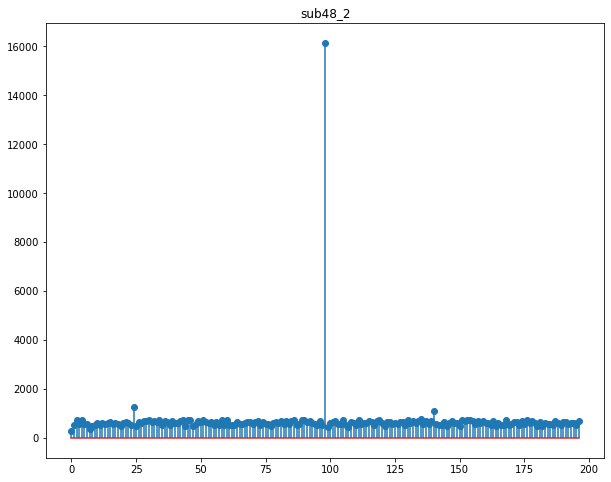

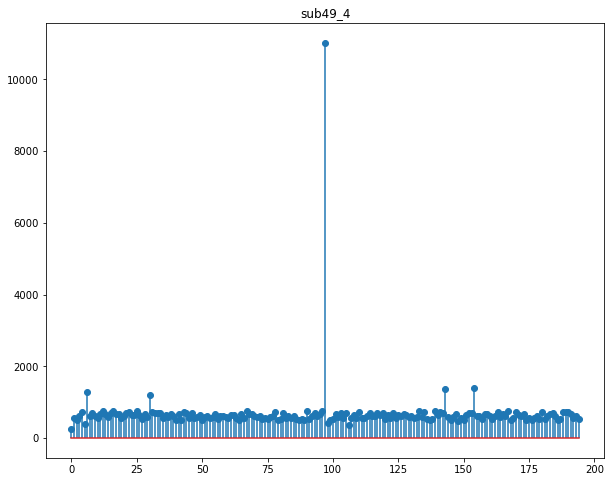

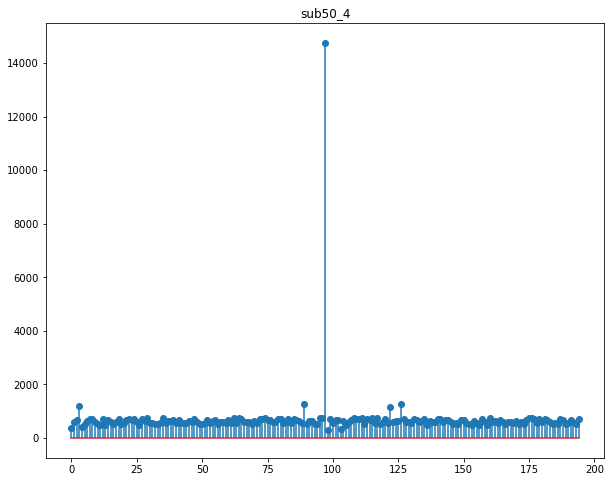

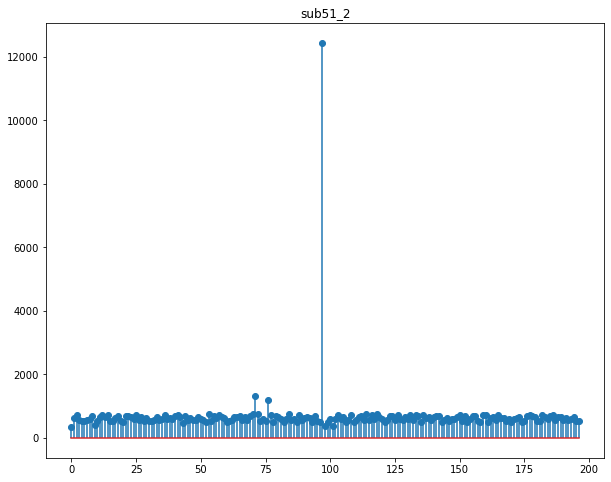

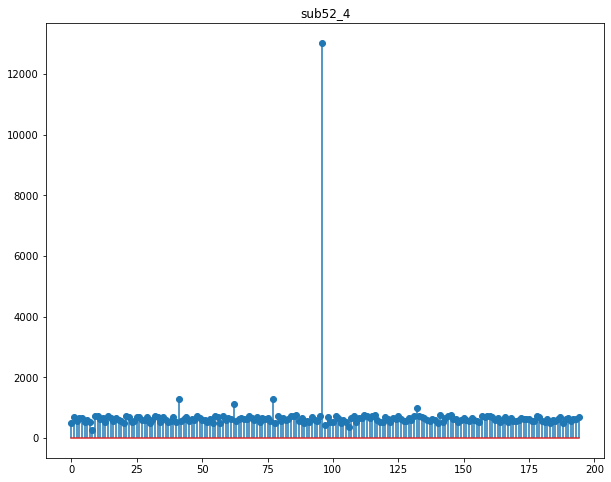

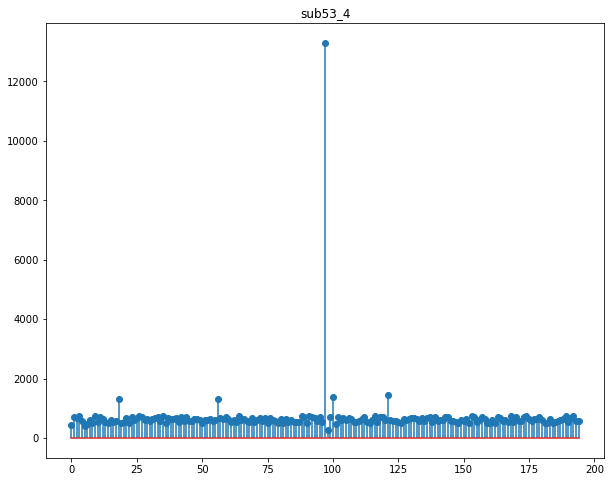

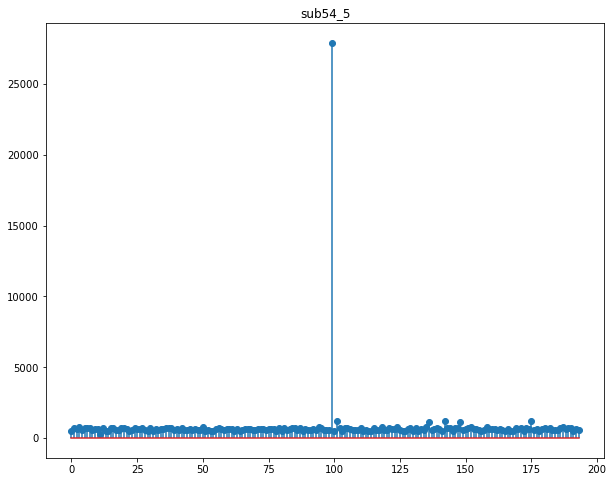

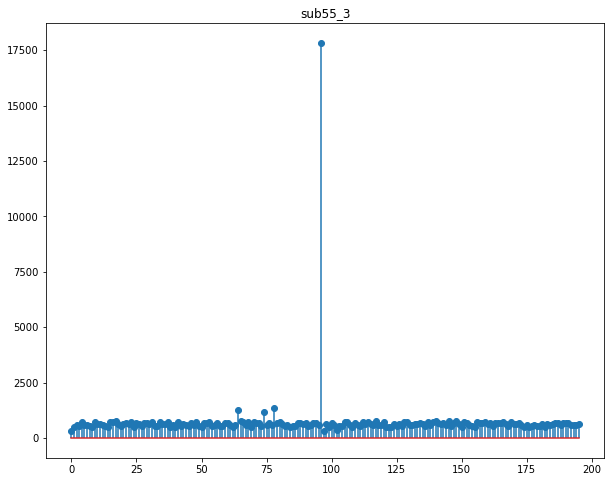

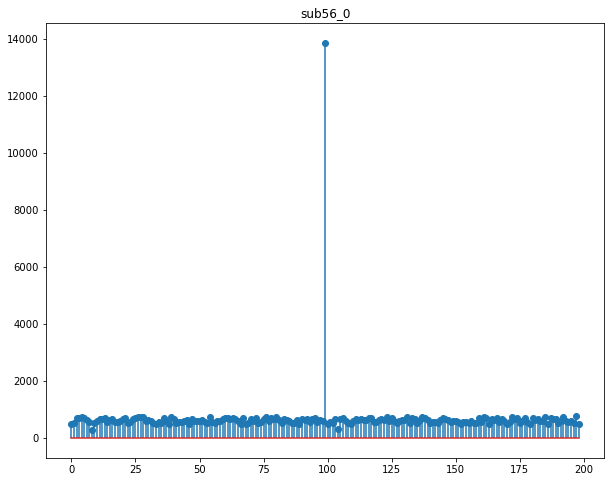

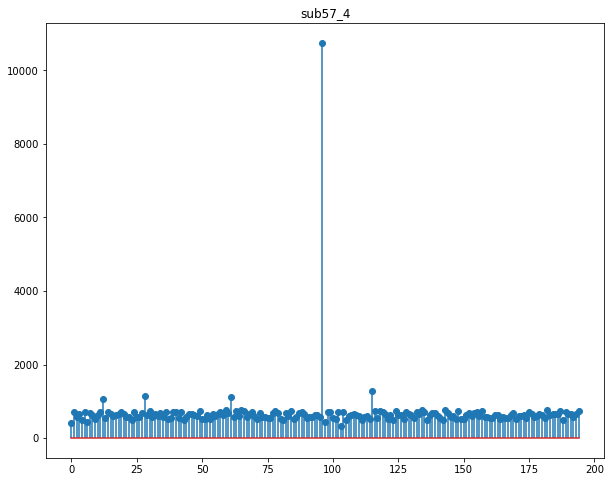

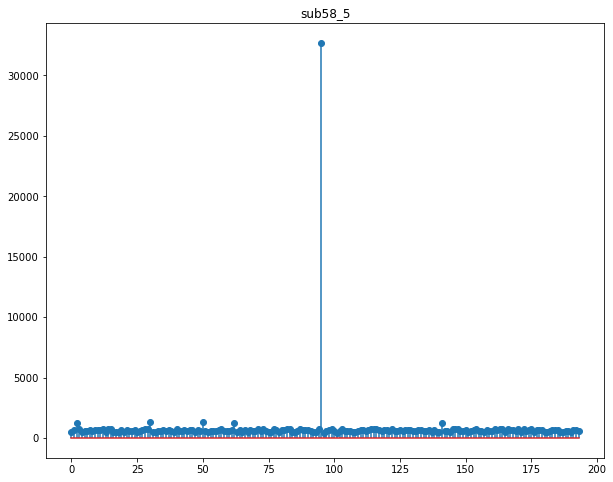

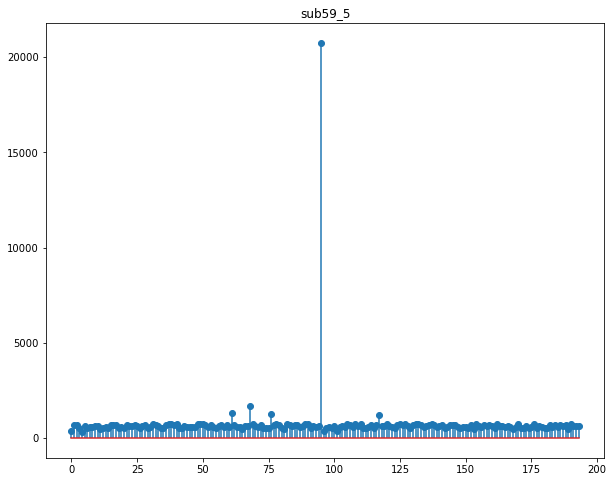

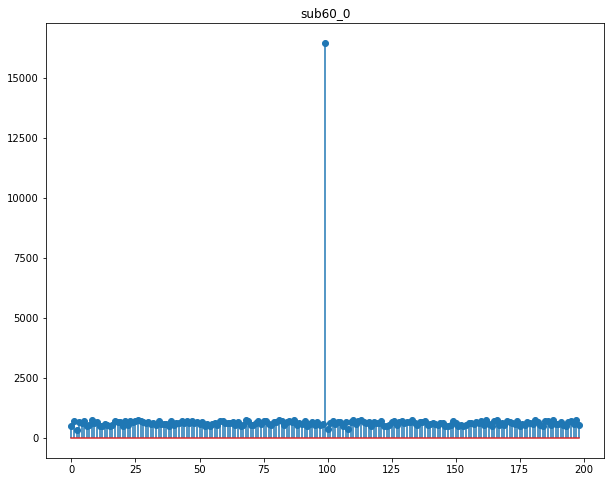

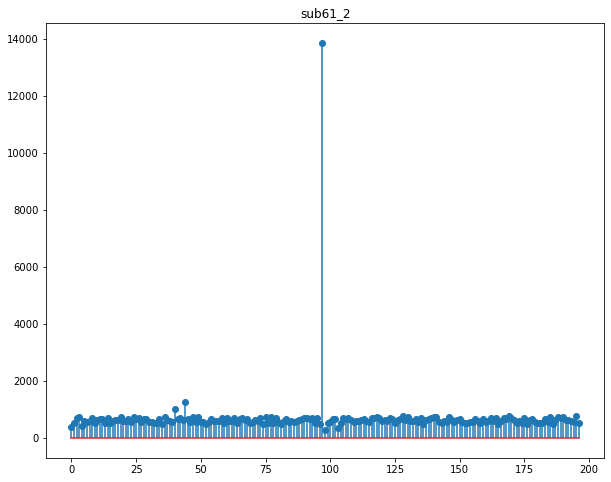

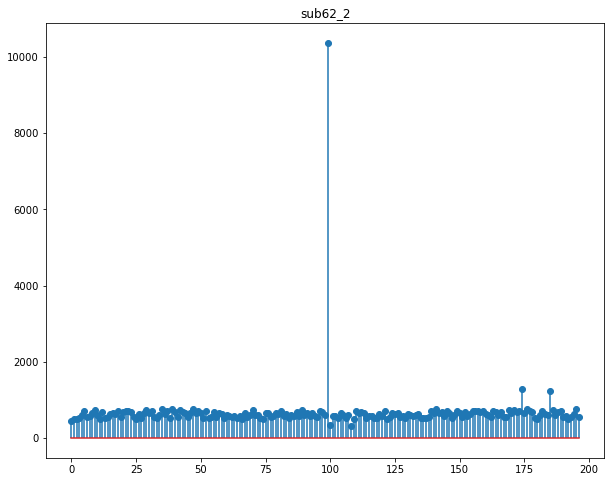

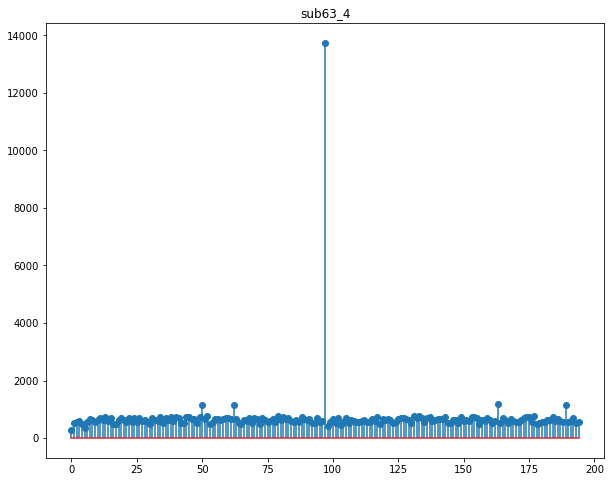

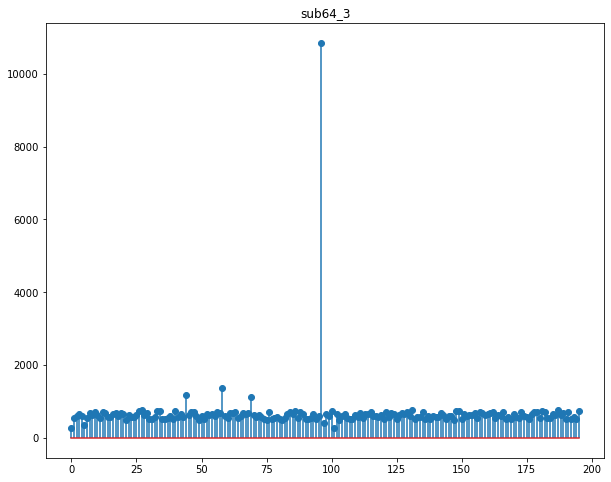

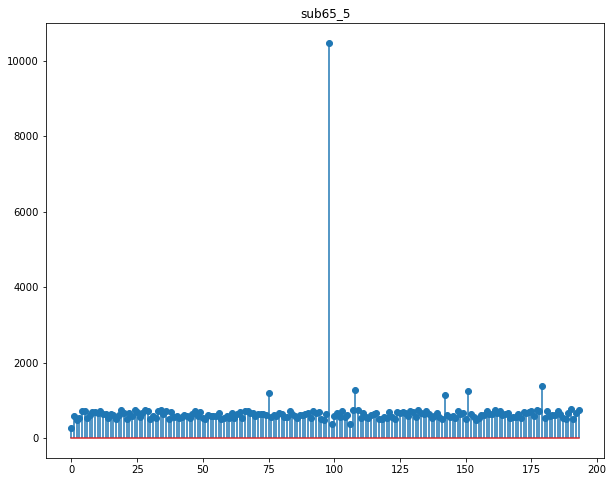

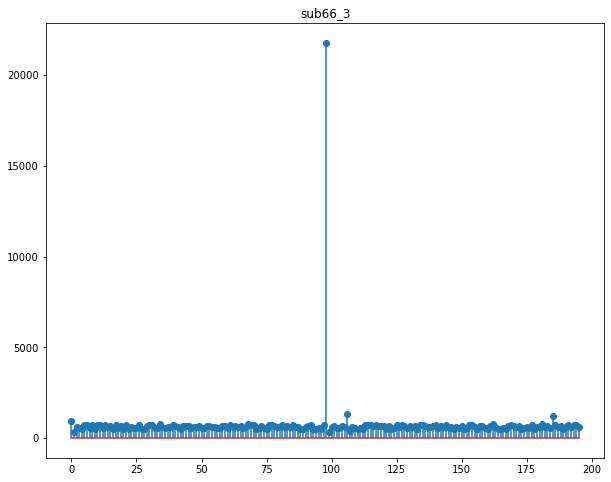

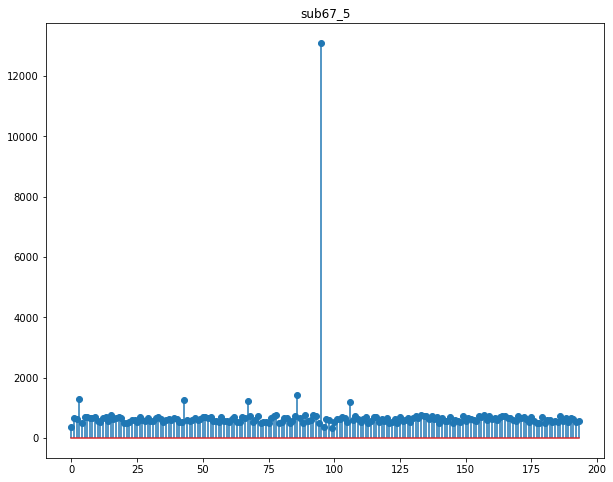

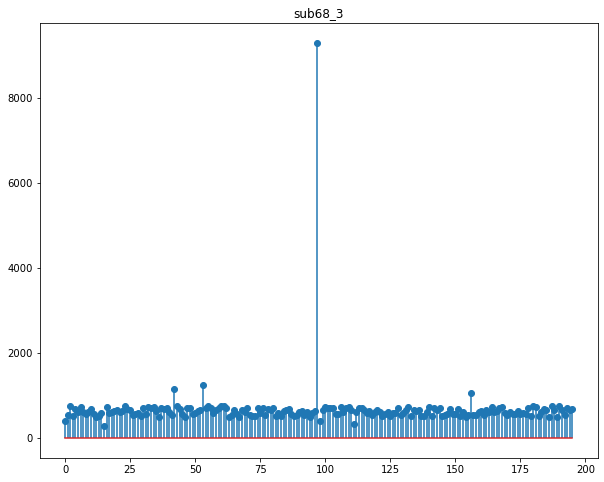

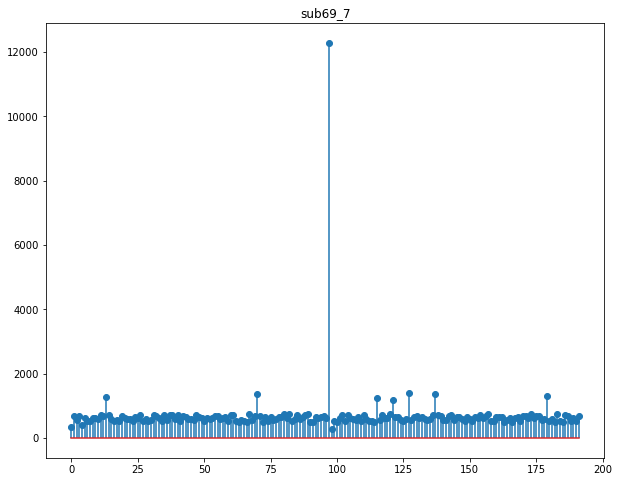

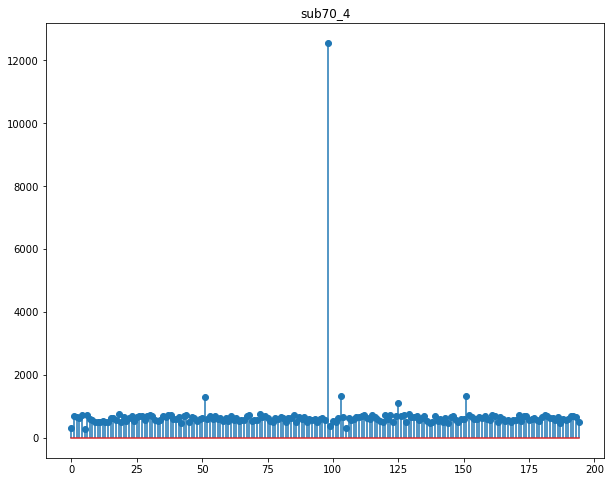

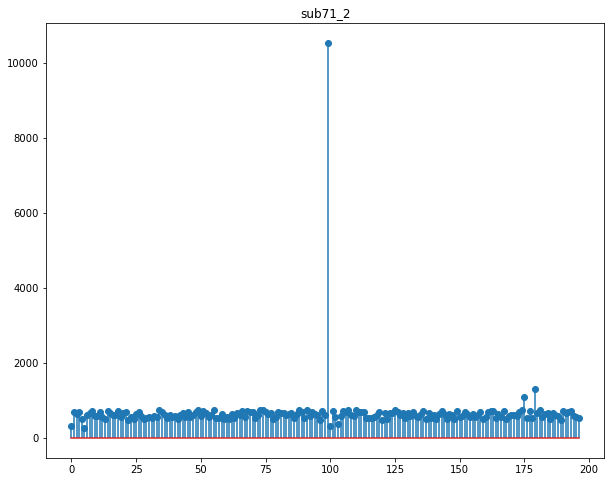

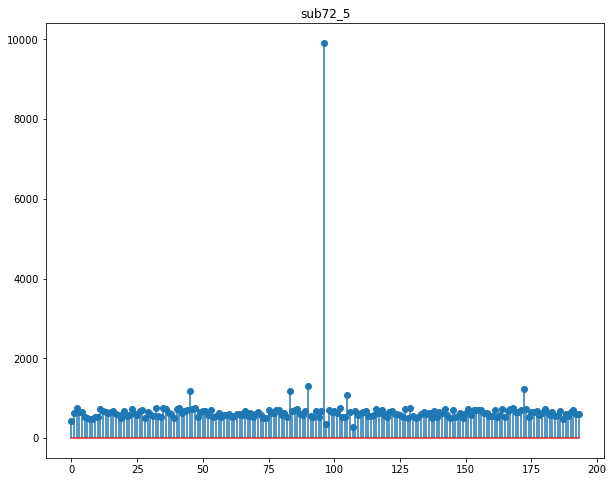

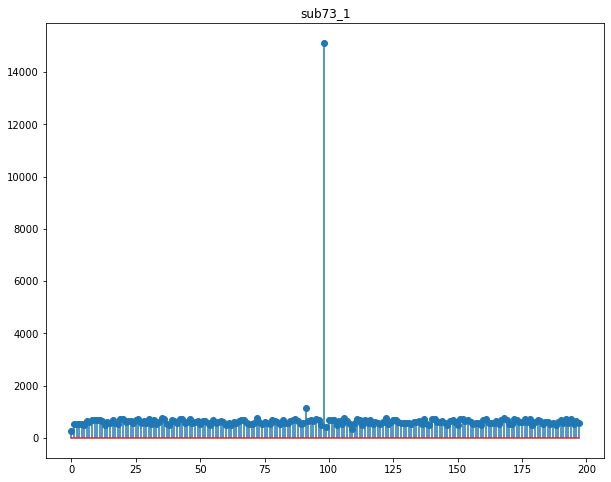

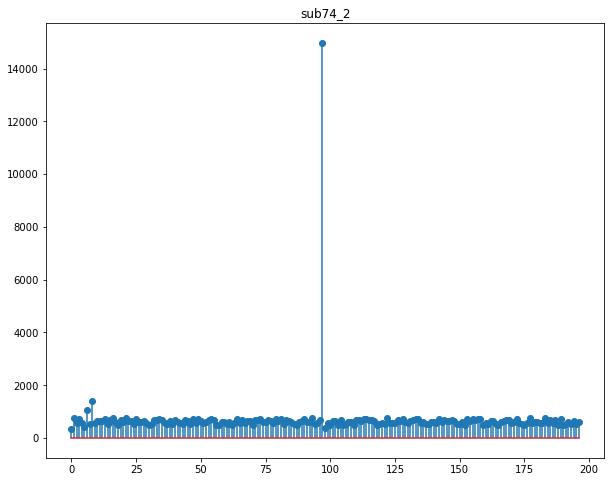

In [43]:
for i in np.arange(75):
    Path_to_load_file = os.path.join(Path,list_tasks_info['local_file_path'][i],list_tasks_info['preprocessed_two'][i])
    EEG = mne.io.read_raw_eeglab(Path_to_load_file, eog=(), preload=True)
    events, event_dict = mne.events_from_annotations(EEG, verbose=0)
    I200 = np.where(events[:,2] == event_dict['S200'])
    I201 = np.where(events[:,2] == event_dict['S201'])
    I202 = np.where(events[:,2] == event_dict['S202'])

    start_index = np.min([I200[0][0],I201[0][0],I202[0][0]])

    delay_latency = events[start_index+1:,0]-events[start_index:-1,0]
    t=plt.figure(figsize=(10,8))
    t=plt.stem(delay_latency)
    t=plt.title(f'sub{i}_{200-(events.shape[0]-start_index)}')
        
    
    
